## Install libraries if necessary

In [119]:
"""Comment out and run cell to install libraries"""
#!pip3 install ipympl
#!pip3 install ipywidgets
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install pandas_datareader

'Comment out and run cell to install libraries'

## Import libraries

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import datetime
import ipympl

## Functions to import price data and trading dates

In [121]:
def read_price_data(stock_symbol, start_date, end_date, interval):
    """Import price data from Yahoo Finance"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    price_series = stock_data.loc[:, 'Adj Close']
    price_series = price_series.fillna(method='ffill')

    # length = len(price_series)
    # stock_return = []
    # for(x) in range(length - 1):
    #     day_return_stock = ((price_series[x + 1] - price_series[x]) / price_series[x])
    #     stock_return.append(day_return_stock)


    return price_series

In [122]:
def get_date_list(stock_symbol, start_date, end_date, interval):
    """Generate list of trading dates"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    date_list = stock_data.index
    
    return date_list

## Import stock data

In [123]:
def getStockData(symbol):
    stock_symbol = symbol # Stock symbol

    # Set time period
    start_date = datetime.datetime(2022, 3, 29)
    end_date = datetime.datetime(2022, 9, 29)
    interval = 'd' # Date interval, by default daily ('d')

    # Import price series and list of trading days
    try:
        date_list = get_date_list(stock_symbol, start_date, end_date, interval=interval)
        date_list_per = get_date_list(stock_symbol, start_date, end_date - datetime.timedelta(1), interval=interval)
        price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)
    except:
        print('Import failed')

    length = len(price_series)
    stock_return = []
    for(x) in range(length - 1):
        day_return_stock = ((price_series[x + 1] - price_series[x]) / price_series[x])
        stock_return.append(day_return_stock)

    return date_list, price_series, date_list_per, stock_return

## Plot price series with annotations

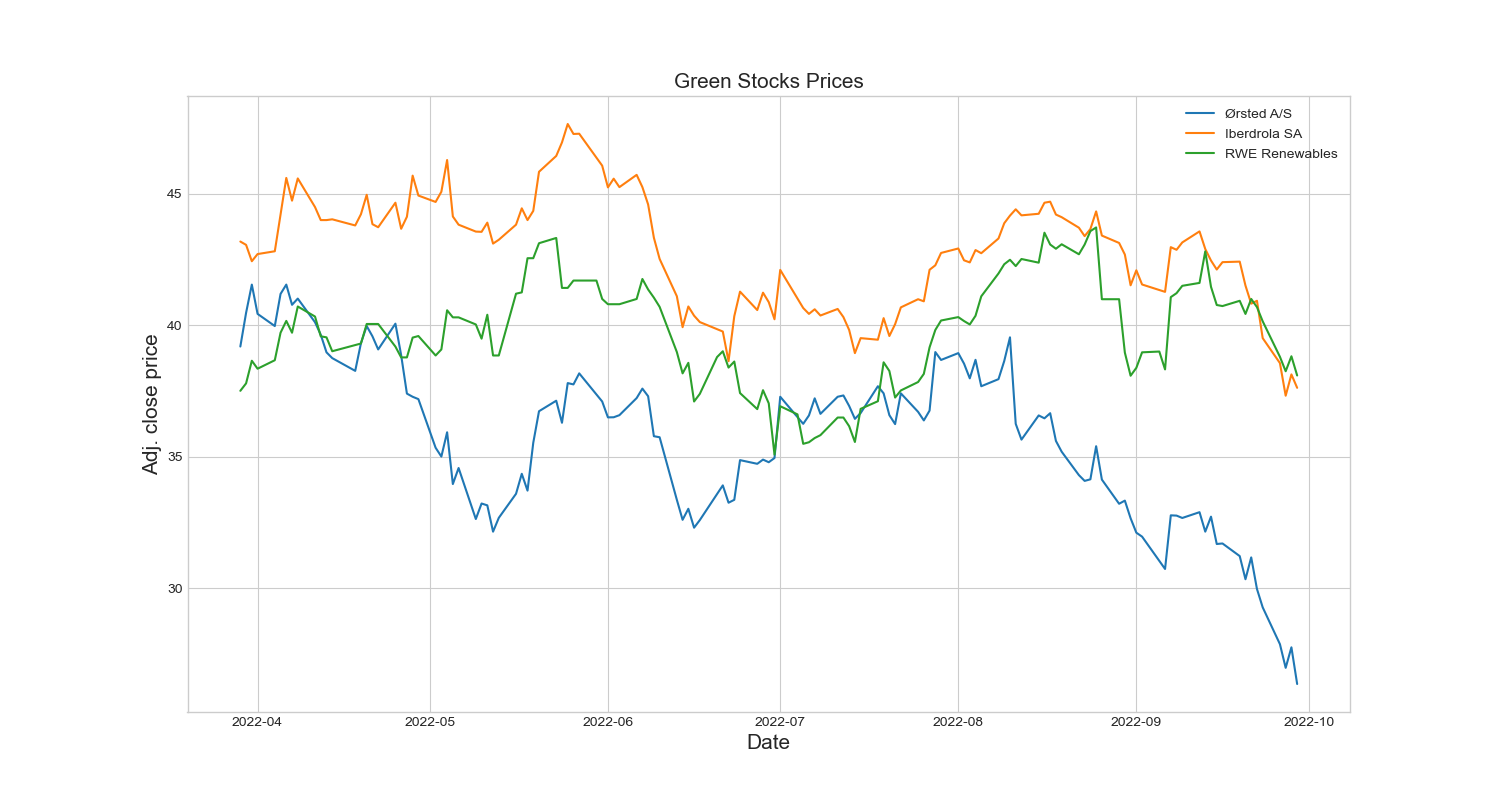

In [124]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('Green Stocks Prices', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
ØrstedData = getStockData("DNNGY")
IberdrolaData = getStockData("IBDRY")
RWEData = getStockData("RWE.DE")
plt.plot(ØrstedData[0], ØrstedData[1], label="Ørsted A/S")
plt.plot(IberdrolaData[0], IberdrolaData[1], label="Iberdrola SA")
plt.plot(RWEData[0], RWEData[1], label="RWE Renewables")
plt.legend()
plt.show()

In [125]:
#Make Events
def getIndex(yyyy, m, d, date_list, price_series):
   index = "none"
   while index == "none":
       for x in range(len(date_list)):
          if (date_list[x] == datetime.datetime(yyyy, m, d)):
              index = x
              break
          elif datetime.datetime(yyyy, m, d) <= date_list[0]:
               return 0
       d -= 1
       if d == 0:
           d = 28
           m -= 1
           if m == 0:
               m = 12
               yyyy -= 1
   return index


def makeEvent(yyyy, m, d, text, ax, date_list, price_series):
   index = getIndex(yyyy, m, d, date_list, price_series)
   ax.annotate(text,
           xy=(date_list[index], price_series[index]),
           xycoords='data',
           bbox=dict(boxstyle="square", fc="none", ec="gray"),
           xytext=(0, 80),
           textcoords='offset points',
           arrowprops=dict(arrowstyle='->', color='gray'),
           va='center',
           ha='left',
           fontsize=8)

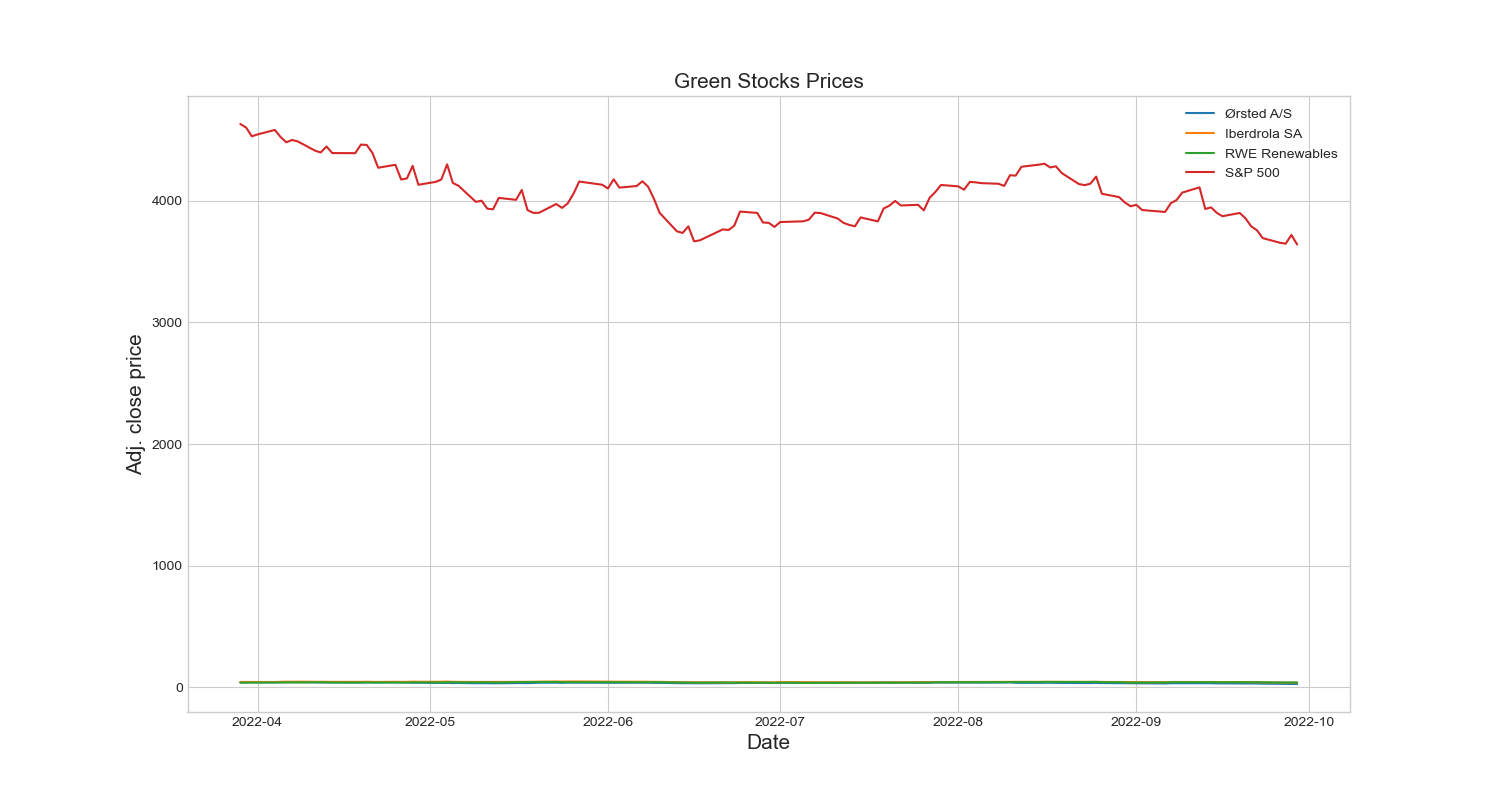

In [126]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax2 = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('Green Stocks Prices', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
ØrstedData = getStockData("DNNGY")
IberdrolaData = getStockData("IBDRY")
RWEData = getStockData("RWE.DE")
S_PData = getStockData("^GSPC")
plt.plot(ØrstedData[0], ØrstedData[1], label="Ørsted A/S")
plt.plot(IberdrolaData[0], IberdrolaData[1], label="Iberdrola SA")
plt.plot(RWEData[0], RWEData[1], label="RWE Renewables")
plt.plot(S_PData[0], S_PData[1], label="S&P 500")
plt.legend()
plt.show()